In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras_preprocessing.image import img_to_array
%matplotlib inline
%load_ext autoreload
%autoreload 2
tf.__version__

'2.4.0'

In [2]:
# from modules.spectral_pool_test import max_pool
from modules.SpectralPool import spectral_pool,max_pool
from modules.FrequencyDropout import freq_dropout_test
from modules.CreateImages import open_image, downscale_image

In [3]:
image = open_image('king.jpeg')
grayscale_image = np.asarray(downscale_image(image, 256, 256).convert('F')) / 255.
image = downscale_image(image, 256, 256).convert('RGB')
image = np.asarray(image) / 255.

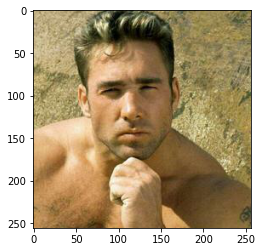

In [4]:
# original image
plt.imshow(image)

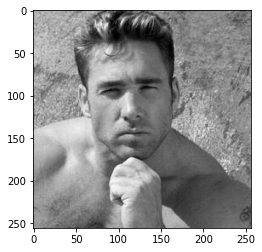

In [5]:
gray_image=tf.image.rgb_to_grayscale(image)
plt.imshow(gray_image,cmap='gray')

In [6]:
# numpy.expand_dims(a, axis)
# Expand the shape of an array.
# Insert a new axis that will appear at the axis position in the expanded array shape.
gray_images = np.expand_dims(gray_image, 0)
print(gray_images.shape)

(1, 256, 256, 1)


In [7]:
def get_fft_plot(fft, eps=1e-12, pad_to_width=256):
    """ Convert a fourier transform returned from tensorflow in a format
    that can be plotted.
    Args:
        fft: numpy array with image and channels
        shift_channel: if True, the channels are assumed as first dimension and
                       will be moved to the end.
        eps: to be added before taking log
    """
    print('fft shape',fft.shape)
    fft=tf.squeeze(fft)
    fft = np.log(fft + eps)
    mn = np.min(fft, axis=(0, 1))
    mx = np.max(fft, axis=(0, 1))

    fft = (fft - mn) / (mx - mn)
    fft_shifted = np.fft.fftshift(fft)
    padding = int((pad_to_width - fft_shifted.shape[1]) / 2)
    if padding < 0:
        padding = 0
    out=np.pad(fft_shifted, pad_width=padding,mode='constant',constant_values=1.,)
    print('out shape',out.shape)
    return out

### Create Grid grayscale:

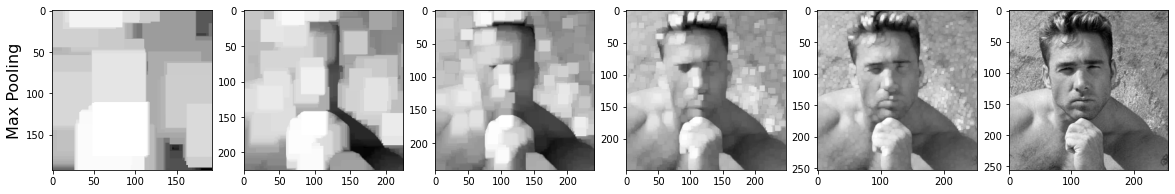

In [8]:
pool_size = [64, 32, 16, 8, 4, 1]
plt.figure(figsize=(20, 9))

for i in range(6):
    ax1 = plt.subplot(1, 6, i+1)
    img_pool = max_pool(gray_images, pool_size=pool_size[i])
    img_pool = tf.squeeze(img_pool,axis=0)
    plt.imshow(img_pool.numpy(),cmap='gray')
    if not i:
        ax1.set_ylabel('Max Pooling', fontsize=16)

cutoff_freq 2
cutoff_freq 4
cutoff_freq 8
cutoff_freq 16
cutoff_freq 32
cutoff_freq 128


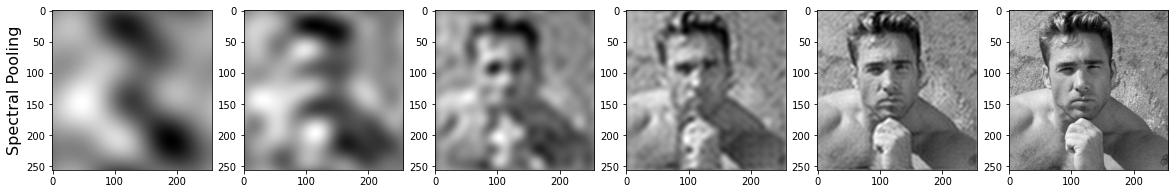

In [9]:
pool_size = [64, 32, 16, 8, 4, 1]
plt.figure(figsize=(20, 9))
for i in range(6):
    ax2 = plt.subplot(1, 6, i+1)
    cutoff_freq = int(256 / (pool_size[i] * 2))
    print('cutoff_freq',cutoff_freq)
    tf_cutoff_freq = tf.cast(tf.constant(cutoff_freq), tf.float32)
    img_pool = freq_dropout_test(gray_images, tf_cutoff_freq)
    img_pool = tf.clip_by_value(img_pool, 0, 1)
    plt.imshow(img_pool.numpy(),cmap='gray')
    if not i:
        ax2.set_ylabel('Spectral Pooling', fontsize=16)

fft shape (5, 5, 1)
out shape (255, 255)
fft shape (9, 9, 1)
out shape (255, 255)
fft shape (17, 17, 1)
out shape (255, 255)
fft shape (33, 33, 1)
out shape (255, 255)
fft shape (65, 65, 1)
out shape (255, 255)
fft shape (257, 257, 1)
out shape (257, 257)


/home/ecbm4040/envTF24/lib/python3.6/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


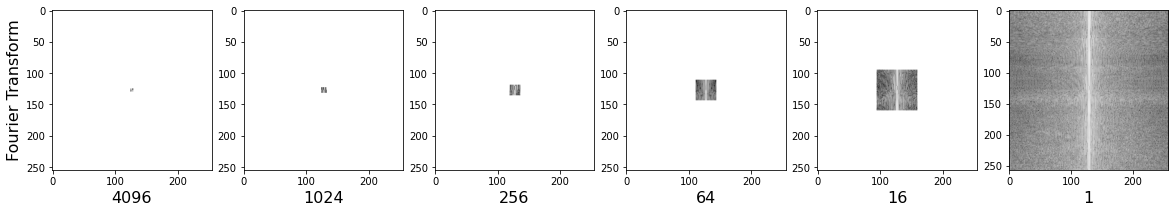

In [10]:
pool_size = [64, 32, 16, 8, 4, 1]
plt.figure(figsize=(20, 9))
for i in range(6):
    ax3 = plt.subplot(1, 6, i+1)
    cutoff_freq = int(256 / (pool_size[i] * 2))
    img_fft, _ = spectral_pool(gray_images,filter_size=(2 * cutoff_freq+1),return_transformed=True)
    plt.imshow(get_fft_plot(img_fft[0]).astype("float64"),cmap='gray')
    ax3.set_xlabel(pool_size[i]**2, fontsize=16)
    if not i:
        ax3.set_ylabel('Fourier Transform', fontsize=16)

### Create Grid RGB:

image.shape: (256, 256, 3)
images.shape: (1, 256, 256, 3)
img_pool.shape (193, 193, 3)
img_pool.shape (225, 225, 3)
img_pool.shape (241, 241, 3)
img_pool.shape (249, 249, 3)
img_pool.shape (253, 253, 3)
img_pool.shape (256, 256, 3)


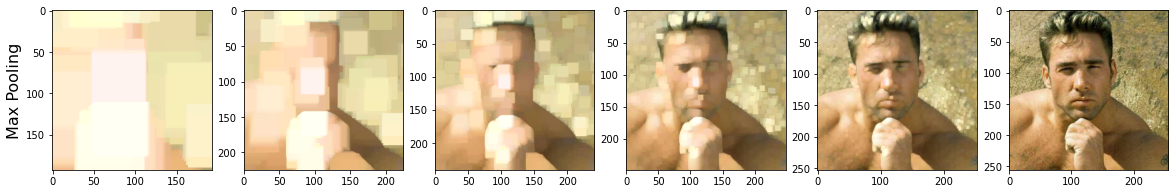

In [11]:
pool_size = [64, 32, 16, 8, 4, 1]
plt.figure(figsize=(20, 9))
print('image.shape:',image.shape)
images = np.expand_dims(image, 0)
print('images.shape:',images.shape)

for i in range(6):
    ax1 = plt.subplot(1, 6, i+1)
    img_pool = max_pool(images, pool_size=pool_size[i])
    img_pool = tf.squeeze(img_pool)
    print('img_pool.shape',img_pool.shape)
    plt.imshow(img_pool.numpy())
    if not i:
        ax1.set_ylabel('Max Pooling', fontsize=16)

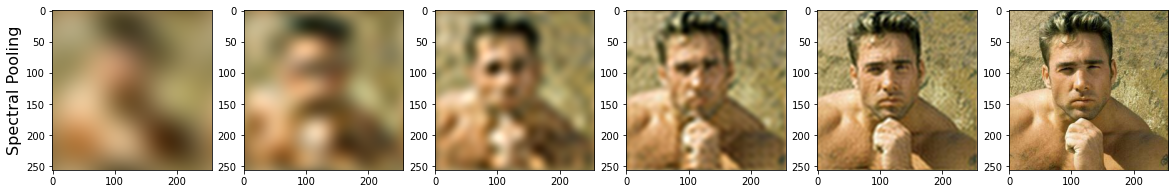

In [12]:
pool_size = [64, 32, 16, 8, 4, 1]
plt.figure(figsize=(20, 9))
for i in range(6):
    ax2 = plt.subplot(1, 6, i+1)
    cutoff_freq = int(256 / (pool_size[i] * 2))
    tf_cutoff_freq = tf.cast(tf.constant(cutoff_freq), tf.float32)
    img_pool = freq_dropout_test(images, tf_cutoff_freq)
    img_pool = tf.clip_by_value(img_pool, 0, 1)
    plt.imshow(img_pool.numpy())
    if not i:
        ax2.set_ylabel('Spectral Pooling', fontsize=16)

fft shape (1, 5, 5, 1)
out shape (255, 255)
fft shape (1, 9, 9, 1)
out shape (255, 255)
fft shape (1, 17, 17, 1)
out shape (255, 255)
fft shape (1, 33, 33, 1)
out shape (255, 255)
fft shape (1, 65, 65, 1)
out shape (255, 255)


/home/ecbm4040/envTF24/lib/python3.6/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


fft shape (1, 257, 257, 1)
out shape (257, 257)


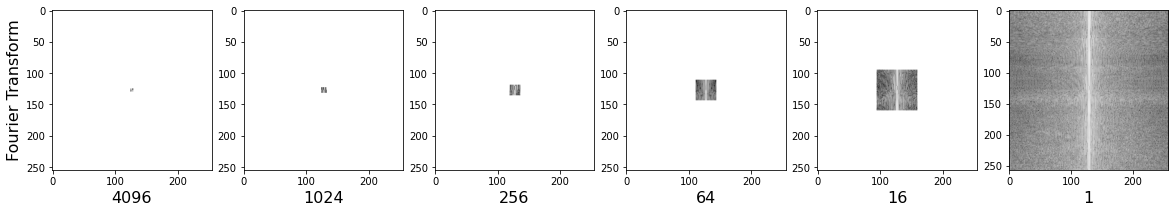

In [13]:
pool_size = [64, 32, 16, 8, 4, 1]
plt.figure(figsize=(20, 9))
for i in range(6):
    ax3 = plt.subplot(1, 6, i+1)
    cutoff_freq = int(256 / (pool_size[i] * 2))
    img_fft, _ = spectral_pool(gray_images,filter_size=(2 * cutoff_freq+1),return_transformed=True)
    plt.imshow(get_fft_plot(img_fft).astype("float64"),cmap='gray')
    ax3.set_xlabel(pool_size[i]**2, fontsize=16)
    if not i:
        ax3.set_ylabel('Fourier Transform', fontsize=16)